In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Classroom/Minería de Datos I 70399-2023-2C-Datos-División A-Día miércoles/Evaluaciones/Parcial 1/Dataset/test.csv')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Classroom/Minería de Datos I 70399-2023-2C-Datos-División A-Día miércoles/Evaluaciones/Parcial 1/Dataset/train.csv')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df1['PassengerId'].duplicated().sum()

0

In [7]:
datos_faltantes = df1.isnull().sum()
datos_faltantes

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
imputer = SimpleImputer(strategy='mean')
df1['Age'] = imputer.fit_transform(df1['Age'].values.reshape(-1, 1))
df1['Fare'] = imputer.fit_transform(df1['Fare'].values.reshape(-1, 1))

In [9]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df2['PassengerId'].duplicated().sum()

0

In [12]:
datos_faltantes = df2.isnull().sum()
datos_faltantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
imputer = SimpleImputer(strategy='mean')
df2['Age'] = imputer.fit_transform(df2['Age'].values.reshape(-1, 1))

In [14]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## Punto 1)
Utilizando la técnica del rango intercuartílico (IRQ) para la detección de outliers, ¿cuántos valores atípicos tiene la variable "Fare" de train, si utilizamos como marcador 1.5 veces el IRQ.

In [15]:
df2_fare = df2['Fare']
df2_fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [16]:
q1 = df2_fare.quantile(0.25)
q3 = df2_fare.quantile(0.75)
iqr = q3 - q1
sup = q3 + iqr * 1.5
inf = q1 - iqr * 1.5
outliers = df2_fare[(df2_fare > sup) | (df2_fare < inf)].index
outliers, inf, sup

(Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
             ...
             792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
            dtype='int64', length=116),
 -26.724,
 65.6344)

In [17]:
print(f"""La cantidad de outliers que tiene "Fare" es de: {len(outliers)}""")

La cantidad de outliers que tiene "Fare" es de: 116


##Punto 2)
¿Cuántos valores perdidos tiene la variable "Embarked" del dataset de train?

In [18]:
df2_embarked_faltantes = df2['Embarked'].isnull().sum()
print(f"""La cantidad de valores perdidos de "Embarked" es de: {df2_embarked_faltantes}""")

La cantidad de valores perdidos de "Embarked" es de: 2


##Punto 3)
Si se considera el conjunto de datos completo (train y test), cuáles de las siguientes variables están correlacionadas negativamente?

In [48]:
df_completo = pd.concat([df1, df2])
df_completo

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1.0


In [49]:
df_completo.reset_index()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,NaN
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,NaN
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,NaN
3,3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,NaN
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0.0
1305,887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0
1306,888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1.0


In [50]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [51]:
df_completo['PassengerId'].duplicated().sum()

0

In [52]:
datos_faltantes = df_completo.isnull().sum()
datos_faltantes

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [53]:
df_completo.corr()

<ipython-input-53-9251a5e316b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_completo.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.038354,0.029203,-0.055224,0.008942,0.031451,-0.005007
Pclass,-0.038354,1.000000,-0.366005,0.060832,0.018322,-0.558448,-0.338481
Age,0.029203,-0.366005,1.000000,-0.191214,-0.130445,0.171301,-0.069809
SibSp,-0.055224,0.060832,-0.191214,1.000000,0.373587,0.160208,-0.035322
Parch,0.008942,0.018322,-0.130445,0.373587,1.000000,0.221506,0.081629
Fare,0.031451,-0.558448,0.171301,0.160208,0.221506,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.069809,-0.035322,0.081629,0.257307,1.000000


Las variables correlacionadas negativamente son las siguientes:
Pclass - PassangerId //
Pclass - Age //
Pclass - Fare //
Pclass - Survived //
Age - SibSp //
Age - Parch //
Age - Survived //
SibSP - PassangerId //
SibSP - Survived //
Survived - PassengerId //

##Punto 4)
Las siguientes líneas de código permiten obtener un gráfico de barras parael dataset de train, que muestra la probabilidad de sobrevivir por sexo.
 *import seaborn as sns
g = sns.barplot(x = "Sex",
y ="Survived"
,
data = train)
g = g.set_ylabel(
"Probabilidad de sobrevivir")*
Utilizando la función de agrupación de pandas (groupby) podrá obtener los valores exactos de la altura de cada barra. ¿Cuáles son esos valores?

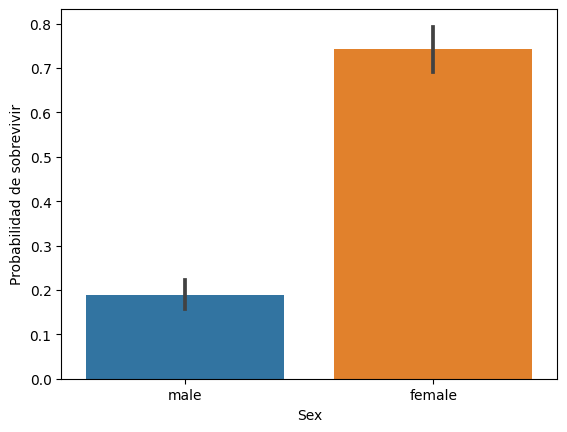

In [24]:
# 4)
import seaborn as sns
g = sns.barplot(x = "Sex",
                y ="Survived",
                data = df2)
g = g.set_ylabel("Probabilidad de sobrevivir")

In [25]:
prob = df2.groupby('Sex')['Survived'].mean()
prob

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

##Punto 5)
A partir de la siguiente línea de código podrá obtener una lista con todas las abreviaturas usadas en la columna "Name". (aquí "dataset" es la variableDataFrame que tiene el conjunto de datos completo, train y test)

*dataset_title = list(set([i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]))*

Escriba las líneas de código necesarias para generar el gráfico de abajo (
no es necesario utilizar los mismos colores
):

In [57]:
# 5)
df_completo_title = [i.split(",")[1].split(".")[0].strip() for i in df_completo["Name"]]
df_completo_title

['Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Master',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Ms',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'M

In [58]:
df_completo_title = pd.DataFrame(df_completo_title, columns = ['Title'])
df_completo_title

,Title
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs
...,...
1304,Rev
1305,Miss
1306,Miss
1307,Mr


In [67]:
df_completo["Title"] = df_completo_title
df_completo

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,NaN,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,NaN,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,NaN,Mr
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,NaN,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,NaN,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0.0,Mr
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0.0,Mr
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1.0,Mr


In [70]:
df_completo["Title"] = df_completo["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_completo["Title"] = df_completo["Title"].map({"Master":1, "Miss":2, "Ms":2, "Mme":2, "Mlle":2, "Mrs":2, "Mr":3, "Rare":4})

<Axes: xlabel='Title', ylabel='count'>

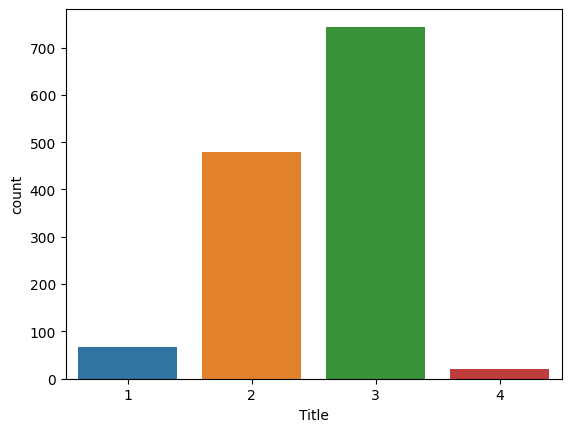

In [71]:
sns.countplot(x = 'Title', data = df_completo)

##Punto 6)
Considerando el dataset completo (train y test), ¿cuántas personas NO sobrevivieron en la hundimiento del Titanic?

In [73]:
# 6)
not_survived = 0
for x in df_completo['Survived']:
  if x == 0:
    not_survived += 1

In [74]:
not_survived

549

##Punto 7)
Usando una tabla de contingencia entre la clase de pasajero y el sexo, ¿cuál de las siguientes es la correcta?

In [33]:
# 7)
tabla_contingencia = pd.crosstab(df_completo['Sex'], df_completo['Pclass'])
tabla_contingencia

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


##Punto 8)
¿Cuál es el percentil 21 de la variable "Age"?

In [75]:
# 8)
df_completo_age = df_completo['Age']
df_completo_age

0      34.500000
1      47.000000
2      62.000000
3      27.000000
4      22.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 1309, dtype: float64

In [76]:
age_np = np.array([df_completo_age])
age_np

array([[34.5       , 47.        , 62.        , ..., 29.69911765,
        26.        , 32.        ]])

In [77]:
p_21 = np.percentile(age_np, 21)
p_21

21.0

In [78]:
percentil_21 = df_completo['Age'].quantile(0.21)
percentil_21

21.0

##Punto 9)
Al aplicar el OneHotEncoder para las variables "Sex" y "Embarked", luego deeliminar valores nulos, ¿cuántas nuevas columnas se agregarían aldataset?

In [79]:
# 9)
df_completo['Sex'].unique()

array(['male', 'female'], dtype=object)

In [80]:
df_completo['Embarked'].unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [90]:
columnas_categoricas = df_completo[['Sex', 'Embarked']]
columnas_categoricas

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [91]:
columnas_categoricas = columnas_categoricas.dropna()

In [88]:
onehot_encoder = OneHotEncoder(sparse = False)

In [92]:
encoded_categorias = onehot_encoder.fit_transform(columnas_categoricas)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
df_categorias = pd.DataFrame(encoded_categorias)
print("La cantidad de columnas agregadas al dataset son: ",df_categorias.shape[1])

La cantidad de columnas agregadas al dataset son:  5


##Punto 10)
Si se considera que los outliers para la variable "Age" son todos aquellos
pasajeros que tienen más de 73 años, entonces se considera que:

* Un outlier es aquel que está por encima de la media

* Un outlier es aquel que está a cuatro desviaciones estándares por encima de la
media

* Un outlier es aquel que está a tres desviaciones estándares por encima de la media

* Un outlier es aquel que está por encima del IRQ * 1.5

La primera opción se puede descartar ya que si tomamos como outlier a los que están por encima de la media, todos los valores serían outliers potenciales, no solamente los que tienen más de 73 años.

La cuarta opción se puede verificar de forma similar al primer punto.

In [105]:
# 10)
df_age = df_completo['Age']
q1 = df_age.quantile(0.25)
q3 = df_age.quantile(0.75)
iqr = q3 - q1
sup = q3 + iqr * 1.5
sup

54.5

Calculamos las opciones 2 y 3.

In [106]:
media = df_age.mean()
dstd_3 = df_age.std() * 3
dstd_4 = df_age.std() * 4

In [107]:
print(media + dstd_3, media + dstd_4)

68.53351799189787 81.41727619326801


Como conclusión, el valor más cercano a 73 es el resultado de estar tres desviaciones estándares por encima de la media, por lo cual, la respuesta correcta sería la tercera opción:
* Un outlier es aquel que está a tres desviaciones estándares por encima de la media